In [1]:
import torch
import torch.nn as nn
import numpy as np



class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=15, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(15*96*96, 50)
    def forward(self, x):
        x = self.conv1(x)
        x = x.flatten()
        x = self.fc1(x)
        return x

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Define a simple CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 1000)
        self.fc2 = nn.Linear(1000, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')


Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch [1/5], Step [100/938], Loss: 0.2402
Epoch [1/5], Step [200/938], Loss: 0.1696
Epoch [1/5], Step [300/938], Loss: 0.0692
Epoch [1/5], Step [400/938], Loss: 0.0453
Epoch [1/5], Step [500/938], Loss: 0.0191
Epoch [1/5], Step [600/938], Loss: 0.0089
Epoch [1/5], Step [700/938], Loss: 0.0310
Epoch [1/5], Step [800/938], Loss: 0.0178
Epoch [1/5], Step [900/938], Loss: 0.0359
Epoch [1/5], Loss: 0.1225
Epoch [2/5], Step [100/938], Loss: 0.0270
Epoch [2/5], Step [200/938], Loss: 0.0104
Epoch [2/5], Step [300/938], Loss: 0.0159
Epoch [2/5], Step [400/938], Loss: 0.0170
Epoch [2/5], Step [500/938], Loss: 0.0149
Epoch [2/5], Step [600/938], Loss: 0.0141
Epoch [2/5], Step [700/938], Loss: 0.0293
Epoch [2/5], Step [800/938], Loss: 0.0380
Epoch [2/5], Step [900/938], Loss: 0.0424
Epoch [2/5], Loss: 0.0385
Epoch [3/5], Step [100/938], Loss: 0.0781
Epoch [3/5], Step [200/938], Loss: 0.0160
Epoch [3/5], Step [300/938], Loss

In [15]:
import matplotlib.pyplot as plt

In [22]:
iter(train_loader)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


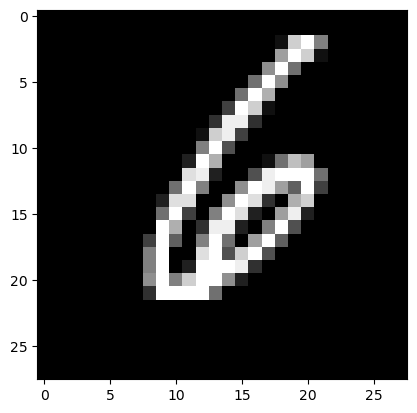

Label: 6


In [29]:
# Display image and label.
train_features, train_labels = next(iter(train_loader), 3)
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")